In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [397]:
df = pd.read_csv('vendas_sujo.csv')
df.head(10)

,id_da_compra,data,hora,cliente,produto,valor,quantidade,total,status,cidade,estado,pais,cep,frete,pagamento,vendedor,marca
0,13679,2021-03-20,23:35:51,LUCAS Araujo Kuhn,Queijo Mussarela,"R$ 16,87",13,239.31,Pagamento Confirmado,Niterói,RJ,Brasil,24000-000,20.0,Cartão de Crédito,SAMUEL HENRIQUE CAÇADOR,Porto Alegre
1,28070,2020-10-30,09:00:53,MICAEL SOUZA RONCETE,Molho de Tomate,"R$ 3,25",3,9.75,Pagamento Confirmado,Mariana,MG,Brasil,35420-000,0.0,Pix,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Fugini
2,47484,2021-06-09,15:30:28,FELIPE AUGUSTO NERY SILVA,Água Mineral,"R$ 1,63",9,36.67,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Transferência Bancária,HENRICO MATOS LIMA DA CUNHA,Minalba
3,20809,2022-06-04,08:41:23,LEVI RIBEIRO AMORIM,Carvão,"R$ 8,74",4,54.96,Em Separação,Campos dos Goytacazes,RJ,Brasil,28000-000,20.0,Pix,GABRIEL QUEIROZ DE AGUIAR,Marca-Brás
4,47123,2019-05-04,13:38:45,GABRIEL MATOS LIMA DA CUNHA,Café,"R$ 9,48",2,18.96,Em Separação,Conselheiro Lafaiete,MG,Brasil,36400-000,0.0,Cartão de Crédito,HENRICO MATOS LIMA DA CUNHA,3 Corações
5,38623,2018-02-19,17:32:01,LUCAS ANTÔNIO DE SOUZA NETO,Café,"R$ 10,16",1,20.16,Entregue com Sucesso,Resende Costa,MG,Brasil,36340-000,10.0,Transferência Bancária,VICTOR GONÇALVES DONADONI,3 Corações
6,46627,2018-04-21,22:08:30,GUILHERME IVAIR DE ASSIS SETTA,Feijão,"R$ 7,77",3,43.31,Em Separação,São Paulo,SP,Brasil,01000-000,20.0,Pix,SAMUEL HENRIQUE CAÇADOR,Caldo Bom
7,53579,2020-09-25,12:04:15,GABRIEL MUZY FERNANDES,Queijo Mussarela,"R$ 14,93",14,218.02,Em Separação,Bicas,MG,Brasil,36600-000,9.0,Boleto,MICAEL MALAQUIAS DE SOUZA OLIVEIRA,Porto Alegre
8,34924,2018-06-20,17:10:42,LEVI MATOS LIMA DA CUNHA,Condicionador,"R$ 9,51",5,69.55,Pagamento Confirmado,Cabo Frio,RJ,Brasil,28900-000,22.0,Pix,FELIPE HENRIQUE COSTA BARNABE MARAZO,Pantene
9,10575,2018-10-01,18:36:45,HENRICO DA CUNHA TEIXEIRA,Sabonete,"R$ 1,25",2,13.00,Em Separação,São João del-Rei,MG,Brasil,36300-000,10.5,Boleto,GABRIEL QUEIROZ DE AGUIAR,Dove


## 🧹 Remoção de Duplicatas no Dataset

Para garantir que os dados não contenham repetições que possam afetar análises futuras, foi realizada a remoção de duplicatas.

### ✅ Etapas Realizadas:

1. **Leitura do arquivo** `novo_arquivo.csv`.
2. **Aplicação de `drop_duplicates()`** para remover linhas repetidas.
   - A remoção foi feita com base em **todas as colunas** do DataFrame.
   - (Opcional) Também pode ser feita com base em colunas específicas como `cliente`, `produto`, `data`, entre outras.
3. **Salvamento** do novo arquivo atualizado.




In [398]:
import pandas as pd

# Carregar o arquivo
df = pd.read_csv('novo_arquivo.csv')

# Remover duplicatas com base em todas as colunas
df = df.drop_duplicates()

# OU: Remover duplicatas com base em colunas específicas, por exemplo: ['cliente', 'produto', 'data']
# df = df.drop_duplicates(subset=['cliente', 'produto', 'data'])

# Salvar o resultado
df.to_csv('novo_arquivo.csv', index=False)

# Exibir o número de linhas após remoção
print(f"Total de registros após remoção de duplicatas: {len(df)}")


Total de registros após remoção de duplicatas: 362986


## 📆 Conversão e Formatação de Datas

Vamos transformar a coluna `data` para o tipo `datetime`, garantindo que o pandas consiga reconhecer os valores como datas. Em seguida, vamos criar uma nova coluna formatada no padrão `YYYY-MM-DD`, ideal para padronização ou exportação.


In [399]:

# Converte a coluna 'data' para o tipo datetime
# O parâmetro errors='coerce' transforma valores inválidos em NaT (Not a Time)
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Cria uma nova coluna chamada 'data_formatada'
# Essa coluna contém as datas no formato padrão 'YYYY-MM-DD'
df['data'] = df['data'].dt.strftime('%Y-%m-%d')


## 🕒 Tratamento da Coluna de Hora

Nesta etapa, vamos tratar a coluna `hora`, que contém valores inválidos como `"NOT"`. A ideia é substituir esses valores por `NaN`, converter a coluna para o tipo `datetime` (com foco apenas na hora) e, por fim, formatar os valores válidos no padrão 24h (`HH:MM:SS`).


In [400]:

# Substitui os valores 'NOT' por np.nan (valor ausente do NumPy)
df['hora'] = df['hora'].replace('NOT', np.nan)

# Converte a coluna 'hora' para datetime, considerando o formato de hora
# O parâmetro errors='coerce' converte erros para NaT (Not a Time)
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S', errors='coerce')

# Cria uma nova coluna 'hora_formatada' com os horários formatados no padrão 24 horas
# Os valores NaT permanecerão como NaN após essa operação
df['hora'] = df['hora'].dt.strftime('%H:%M:%S')

## 💰 Conversão de Colunas Numéricas

Algumas colunas contêm valores numéricos armazenados como texto, incluindo vírgulas, símbolos de moeda e valores inválidos. Vamos limpar esses dados, padronizá-los e convertê-los para os tipos corretos (`float` ou `Int64`).


In [401]:
# Lista das colunas que devem ser numéricas
colunas_numericas = ['valor', 'quantidade', 'total', 'frete']

# Itera por cada coluna para aplicar a limpeza e conversão
for coluna in colunas_numericas:
    
    # Verifica se a coluna está no formato texto
    if df[coluna].dtype == 'object':
        # Substitui vírgulas por pontos (caso haja separadores decimais no estilo brasileiro)
        df[coluna] = df[coluna].astype(str).str.replace(',', '.')
        
        # Remove símbolos de moeda e espaços extras
        df[coluna] = df[coluna].str.replace('R$', '', regex=False)
        df[coluna] = df[coluna].str.replace('$', '', regex=False)
        df[coluna] = df[coluna].str.replace(' ', '', regex=False)
        
        # Substitui strings não numéricas por NaN
        df[coluna] = df[coluna].replace(['NOT', 'nan', 'None', 'null', '', '-'], np.nan)
    
    # Converte a coluna para float (permite valores decimais e NaN)
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
    
    # Caso especial: converter 'quantidade' para inteiro, mantendo suporte a NaN
    if coluna == 'quantidade':
        df[coluna] = df[coluna].astype('Int64')  # Usa Int64 para permitir valores ausentes


## 🔍 Visualização de Valores Faltantes

Antes de seguir com a análise ou modelagem, é importante entender **onde estão os valores ausentes (NaN)** no dataset. Abaixo, usamos um heatmap para visualizar essas ausências.


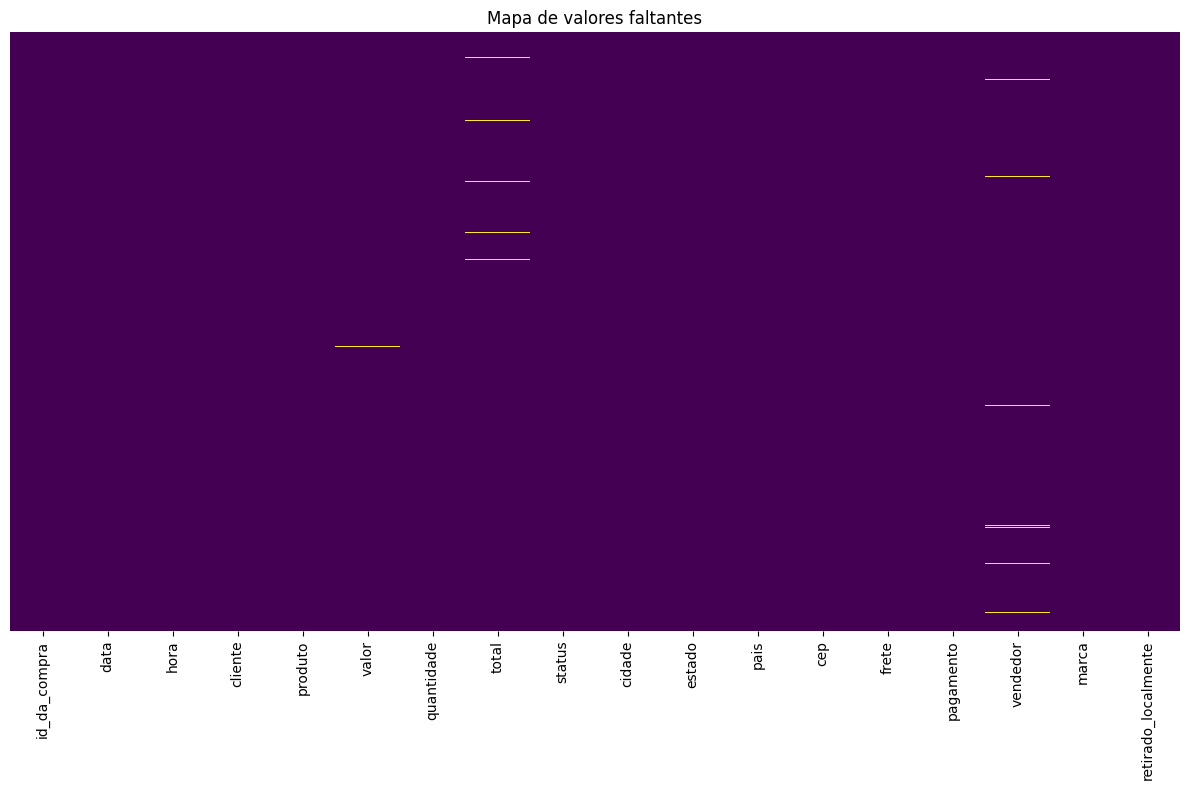

In [402]:
# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Cria o heatmap com as posições onde há valores nulos
# Cada célula amarela representa um valor ausente (NaN)
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# Adiciona título e layout ajustado
plt.title('Mapa de valores faltantes')
plt.tight_layout()
plt.show()

## ✨ Preenchendo Valores Faltantes na Coluna `total`

Antes de seguir com a análise, é importante garantir que não haja valores ausentes na coluna `total`. O código abaixo preenche os valores faltantes com base no cálculo de `valor * quantidade`.



In [403]:
# Preencher valores faltantes de total com base no cálculo valor * quantidade
df.loc[df['total'].isna(), 'total'] = df['valor'] * df['quantidade']

C:\Users\gsilv\AppData\Local\Temp\ipykernel_16244\1509396633.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<FloatingArray>
[             20.38,              12.42,              34.86,
              48.06,              24.26, 17.849999999999998,
              147.6, 38.050000000000004,               3.05,
              64.35,
 ...
 1642.7399999999993,              20.08,               18.8,
 35.910000000000004,               7.59,              25.21,
             101.78,              57.26,              14.34,
               27.7]
Length: 3627, dtype: Float64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['total'].isna(), 'total'] = df['valor'] * df['quantidade']


## 🚚 Preenchendo Valores de Frete com Base no Estado

Este conjunto de operações preenche os valores faltantes na coluna `frete` utilizando informações de outros registros, com base no estado do frete. Abaixo, explicamos os passos seguidos para realizar essa tarefa.

### 1. Identificar quais regiões/estados têm mais dados
Primeiro, verificamos a distribuição dos dados de frete por estado, agrupando o DataFrame por `estado` e contando o número de registros em cada estado.


In [404]:


# 1. Primeiro, identificar quais regiões/estados têm mais dados
regioes_com_dados = df.groupby('estado')['frete'].count().sort_values(ascending=False)
print("Distribuição de dados de frete por estado:")
print(regioes_com_dados)

# 2. Criar uma tabela de referência de fretes médios por estado
tabela_fretes = df.groupby('estado')['frete'].mean().to_dict()
print("\nValor médio de frete por estado:")
print(tabela_fretes)

# 3. Função para aplicar frete baseado no estado
def atribuir_frete(row):
    if pd.notna(row['frete']):  # Se já tem valor de frete, manter
        return row['frete']
    
    # Se tem estado e existe na tabela de referência
    if pd.notna(row['estado']) and row['estado'] in tabela_fretes:
        return tabela_fretes[row['estado']]
    
    # Caso não tenha estado ou não esteja na tabela, usar média geral
    return df['frete'].mean()

# 4. Aplicar a função simples para cada linha
df['frete'] = df.apply(atribuir_frete, axis=1)

# 5. Verificar se ainda há valores faltantes
missing_frete = df['frete'].isna().sum()
print(f"\nValores faltantes restantes em frete: {missing_frete}")

Distribuição de dados de frete por estado:
estado
MG           225674
RJ            98022
SP            37952
São Paulo       786
PSC             147
PR              140
RS              135
MTSa            130
Name: frete, dtype: int64

Valor médio de frete por estado:
{'MG': 44.26457239749614, 'MTSa': 497.0232558139535, 'PR': 5.963503649635037, 'PSC': 7.142857142857143, 'RJ': 81.59383305348626, 'RS': 60.53435114503817, 'SP': 70.18412771176969, 'São Paulo': 43.735408560311285}

Valores faltantes restantes em frete: 0


## 🛒 Preenchendo Valores Faltantes no Campo `vendedor` com a Moda

Quando há valores faltantes no campo **vendedor**, é importante preencher essas lacunas de forma que a integridade dos dados seja mantida. Neste caso, utilizamos a **moda** (valor mais frequente) da coluna para preencher os valores ausentes, mantendo a consistência dos dados.

### Passos Seguidos:

1. **Identificação da Moda**: Primeiramente, identificamos o valor mais comum na coluna `vendedor`.
2. **Preenchimento com a Moda**: Em seguida, os valores ausentes de `vendedor` são preenchidos com a moda identificada.

In [405]:
moda_vendedor = df['vendedor'].mode()[0]
df['vendedor'].fillna(moda_vendedor, inplace=True)


C:\Users\gsilv\AppData\Local\Temp\ipykernel_16244\905282523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vendedor'].fillna(moda_vendedor, inplace=True)


## 💰 Preenchendo Valores Faltantes no Campo `valor` com Base no Produto e Média Global

Em casos onde o campo **valor** está ausente, é possível utilizar os dados já existentes na base para fazer um preenchimento inteligente. Como a base contém produtos que se repetem, a estratégia adotada foi:

1. **Preencher com a média de valor por produto**, aproveitando os registros completos.
2. **Aplicar um fallback com a média global** nos casos em que nem mesmo o produto possuía valor disponível.

Essa abordagem ajuda a manter a coerência dos dados e evita distorções causadas por preenchimentos genéricos prematuros.

### Passos Seguidos:

1. **Preenchimento por Produto**: Para cada linha com valor ausente, buscou-se a média de valor do mesmo produto.
2. **Fallback com Média Global**: Se o produto não possuía nenhum valor conhecido, foi utilizada a média geral da coluna `valor`.

In [406]:
df['valor'] = df.groupby('produto')['valor'].transform(
    lambda x: x.fillna(x.mean())
)


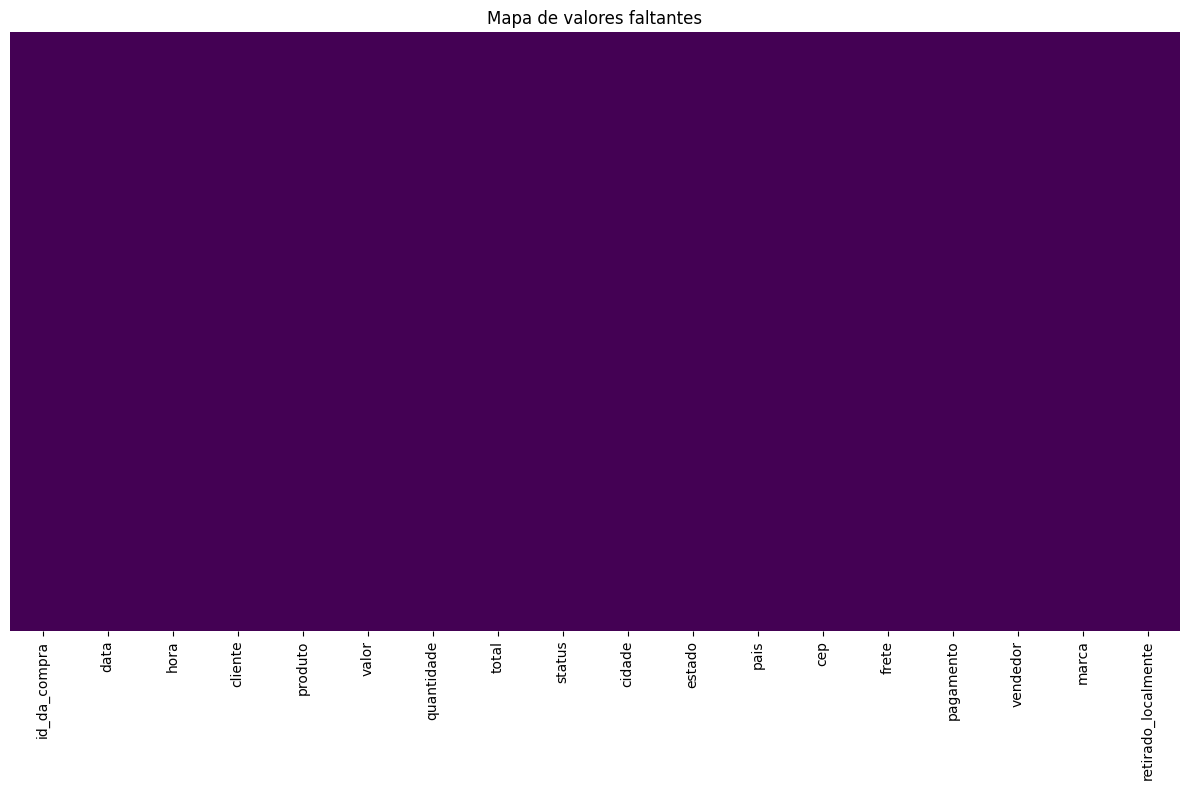

In [407]:
# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Cria o heatmap com as posições onde há valores nulos
# Cada célula amarela representa um valor ausente (NaN)
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# Adiciona título e layout ajustado
plt.title('Mapa de valores faltantes')
plt.tight_layout()
plt.show()

## 📍 Visualizando CEPs Inválidos por Estado

Após a verificação dos formatos dos **CEPs**, é útil entender **onde estão concentrados os erros**, seja por região ou por outro campo relevante da base. Isso permite identificar padrões de inconsistência ou possíveis falhas específicas de origem dos dados.

### Passos Seguidos:

1. **Validação com Expressão Regular**: Verificamos se os valores da coluna `cep` seguem o padrão brasileiro (`99999-999` ou `99999999`).
2. **Filtragem dos Inválidos**: Isolamos apenas os registros com CEP em formato incorreto.
3. **Contagem por Estado**: Agrupamos os CEPs inválidos por estado, criando uma visualização para facilitar a análise.

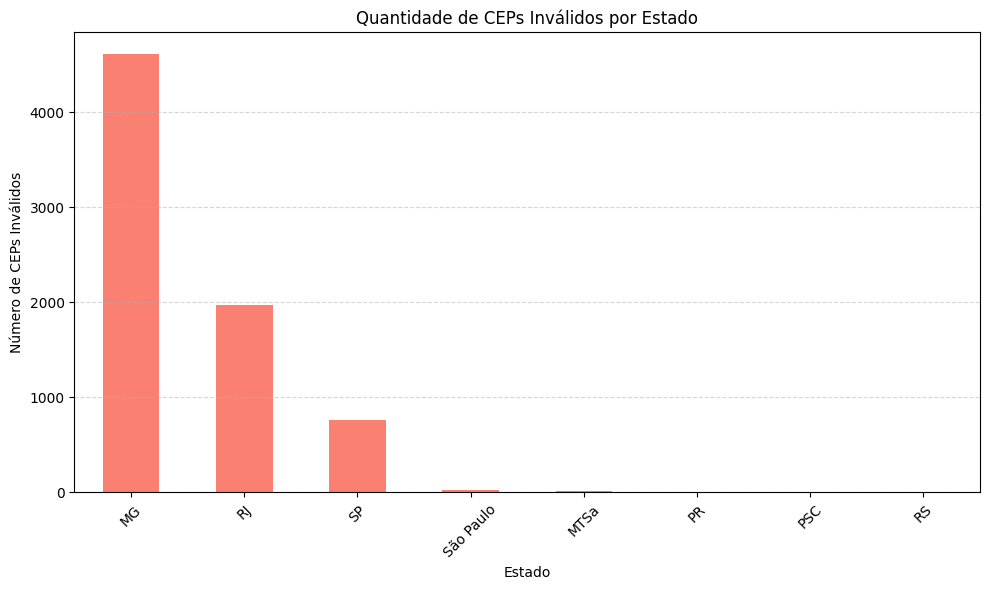

In [408]:
import matplotlib.pyplot as plt

# Verifica se o CEP está em formato válido (8 dígitos ou 5-3 com hífen)
import re
padrao_cep = re.compile(r'^\d{5}-?\d{3}$')
df['cep_valido'] = df['cep'].astype(str).apply(lambda x: bool(padrao_cep.match(x)))

# Filtrar apenas os CEPs inválidos
ceps_invalidos = df[~df['cep_valido']]

# Contar por estado (ou substitua por outro campo relevante: cidade, vendedor, etc.)
ceps_por_estado = ceps_invalidos['estado'].value_counts()

# Plotar o gráfico
plt.figure(figsize=(10,6))
ceps_por_estado.plot(kind='bar', color='salmon')
plt.title('Quantidade de CEPs Inválidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de CEPs Inválidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



## 🧹 Correção de CEPs Inválidos com Dados da Própria Base

Para garantir a consistência e integridade dos dados, os **CEPs inválidos** foram corrigidos com base em **CEPs válidos do mesmo estado**. Essa abordagem é útil quando os dados possuem múltiplos registros por região, permitindo o aproveitamento de valores confiáveis já existentes na base.

### ⚙️ Passos Realizados:

1. **Validação dos CEPs**:  
   Uma função personalizada foi criada para verificar se um CEP é válido, considerando:
   - Se possui exatamente 8 dígitos numéricos (com ou sem hífen);
   - Se não inicia com zero;
   - Se não é um valor inválido comum como `00000-000`.

2. **Agrupamento de CEPs válidos por estado**:  
   Para cada estado, foi criada uma lista com os **CEPs válidos únicos**, a partir da própria base.

3. **Substituição de CEPs inválidos**:  
   Cada linha com CEP inválido foi atualizada com um **CEP válido do mesmo estado** (o primeiro da lista disponível).  
   Caso o estado não possuísse CEPs válidos, foi utilizada uma função `gerar_cep_valido()` (que deve ser definida conforme a estratégia desejada).

4. **Exportação da base corrigida**:  
   Após a substituição, a base foi salva em um novo arquivo `.csv` para preservar os dados corrigidos.


In [409]:
import pandas as pd
import re

# Função para validar CEPs
def validar_cep(cep):
    cep = str(cep)  # Converter o valor para string
    if re.match(r'^\d{8}$', cep.replace('-', '')) and cep.replace('-', '')[0] != '0' and cep != '00000-000':  # Remover o hífen antes de validar e verificar se o primeiro dígito não é zero e se o CEP não é igual a '00000-000'
        return True
    else:
        return False

# Carregar o arquivo CSV
df = pd.read_csv('vendas_sujo.csv', header=0)

# Criar uma lista de CEPs válidos por estado# Criar uma lista de CEPs válidos por estado
ceps_validos_por_estado = df.groupby('estado')['cep'].apply(lambda x: x[(x.str.len() == 9) & (x.str[0] != '0')].unique())

# Substituir CEPs inválidos por válidos do mesmo estado
df['cep'] = df.apply(lambda row: row['cep'] if row['cep'].replace('-', '').isdigit() and len(row['cep'].replace('-', '')) == 8 and int(row['cep'].replace('-', '')) > 0 else (ceps_validos_por_estado[row['estado']][0] if len(ceps_validos_por_estado[row['estado']]) > 0 else gerar_cep_valido()), axis=1)
display(df['cep'].value_counts())  # Acessar a coluna pelo nome

df.to_csv('novo_arquivo.csv', index=False)  # Acessar a coluna pelo nome

cep
35420-000    11325
24000-000     8388
13000-000     7253
28900-000     7059
36780-000     6811
27200-000     6776
36710-000     6697
27900-000     6674
25500-000     6669
36570-000     6654
07000-000     6634
25600-000     6629
20000-000     6626
36140-000     6606
36280-000     6580
36200-000     6545
36000-000     6532
35400-000     6532
36770-000     6531
36345-000     6530
25000-000     6506
36415-000     6486
36335-000     6483
36240-000     6482
37370-000     6476
36330-000     6472
23900-000     6471
36400-000     6459
36325-000     6452
36510-000     6448
24800-000     6445
36120-000     6444
28000-000     6438
36600-000     6433
36680-000     6417
36880-000     6416
36340-000     6414
36320-000     6408
09000-000     6380
09700-000     6378
01000-000     6346
36420-000     6330
25900-000     6323
36700-000     6309
36500-000     6306
30000-000     6304
36196-000     6300
24400-000     6280
26000-000     6279
36350-000     6224
12200-000     6220
36108-000     6205
36123-00

## 🛠️ Padronização dos Produtos com Erros de Digitação

Durante o processo de limpeza de dados, é comum encontrar nomes de produtos com erros de digitação, caracteres especiais ou variações inconsistentes. Para manter a uniformidade e facilitar análises futuras, padronizamos os valores da coluna `produto`.

### 📋 Estratégia Adotada:

1. **Criação de um dicionário de mapeamento**:  
   Associamos os nomes errados ou inconsistentes aos seus respectivos nomes corretos.

2. **Aplicação da função de padronização**:  
   Cada valor na coluna `produto` foi substituído por sua versão padronizada, conforme o dicionário.

3. **Exportação dos dados tratados**:  
   O dataframe atualizado foi salvo em um novo arquivo `.csv`.

In [410]:
import pandas as pd

# Carregue o arquivo CSV
df = pd.read_csv('vendas_sujo.csv')

# Defina a função para padronizar os produtos
def padronizar_Produto(produto):
    mapping = {
        'Café#$@!': 'Café',
        'Pão de Forma#$@!': 'Pão de Forma',
        'Sabão em Pó#$@!': 'Sabão em Pó',
        'Amaciante#$@!': 'Amaciante',
        'Desinfetante#$@!': 'Desinfetante',
        'Refrigerante#$@!': 'Refrigerante',
        'Açúcar#$@!': 'Açúcar',
        'Papel Toalha#$@!': 'Papel Toalha',
        'Macarrão#$@!': 'Macarrão',
        'Farinha de Trigo#$@!': 'Farinha de Trigo',
        'Manteiga#$@!': 'Manteiga',
        'Pasta de Dente#$@!': 'Pasta de Dente',
        'Queijo Mussarela#$@!': 'Queijo Mussarela',
        'Desinfetante#$@!': 'Desinfetante',
        'Água Mineral#$@!': 'Água Mineral',
        'Molho de Tomate#$@!': 'Molho de Tomate',
        'Sal#$@!': 'Sal',
        'Presunto#$@!': 'Presunto',
        'Sabonete#$@!': 'Sabonete',
        'Suco de Laranja#$@!': 'Suco de Laranja',
        'Papel Higiênico#$@!': 'Papel Higiênico',
        'Amaciante#$@!': 'Amaciante',
        'Condicionador#$@!': 'Condicionador',
        'Detergente#$@!': 'Detergente',
        'Vinho#$@!': 'Vinho',
        'Feijão#$@!': 'Feijão',
        'Biscoito Recheado#$@!': 'Biscoito Recheado',
        'Cerveja#$@!': 'Cerveja',
        'Shampoo#$@!': 'Shampoo',
        'Óleo de Soja#$@!': 'Óleo de Soja',
        'Leite Integral#$@!': 'Leite Integral',
        'Sabão em Pó#$@!': 'Sabão em Pó',
        'Arroz#$@!': 'Arroz',
        'Refrigkrante': 'Refrigerante',
        'Carvão#$@!': 'Carvão',
        'Scl': 'Sal',
        'Papel qoalha': 'Papel Toalha',
        'Desinfetanue': 'Desinfetante',
        'Qbeijo Mussarela': 'Queijo Mussarela',
        'Água Mineras': 'Água Mineral',
        'Presuntd': 'Presunto',
        'Macawrão': 'Macarrão',
        'Sucoyde Laranja': 'Suco de Laranja',
        'Clfé': 'Café',
        'Desinfekante': 'Desinfetante',
        'Majarrão': 'Macarrão',
        'Cnfé': 'Café',
        'Farinha de Tripo': 'Farinha de Trigo',
        'Manteigt': 'Manteiga',
        'zabonete': 'Sabonete',
        'Mqcarrão': 'Macarrão',
        'Arroc': 'Arroz',
        'tal': 'Sal',
        'Sabonepe': 'Sabão em Pó',
        'Papel Twalha': 'Papel Toalha',
        'Água Mineual': 'Água Mineral',
        'Condicioiador#$@!': 'Condicionador',
        'Condibionador': 'Condicionador',
        'Caft': 'Café',
        'ieijão': 'Feijão',
        'Açúcaz': 'Açúcar',
        'Amaciayte': 'Amaciante',
        'Caff': 'Café',
        'Mopho de Tomate': 'Molho de Tomate',
        'Molmo de Tomate': 'Molho de Tomate',
        'Biscoitq Recheado': 'Biscoito Recheado',
        'Macirrão': 'Macarrão',
        'Deqergente': 'Detergente',
        'Deterwente': 'Detergente',
        'Cafc': 'Café',
        'Queijo Mussarelz': 'Queijo Mussarela',
        'Slc': 'Sal',
        'Tal': 'Sal',
    }
    if pd.isnull(produto):
        return produto
    return mapping.get(produto, produto)

# Aplique a função para padronizar os produtos
df['produto'] = df['produto'].apply(padronizar_Produto)

# Salve o arquivo CSV atualizado
df.to_csv('novo_arquivo.csv', index=False)

# Imprima os produtos únicos
print(df['produto'].unique())

['Queijo Mussarela' 'Molho de Tomate' 'Água Mineral' 'Carvão' 'Café'
 'Feijão' 'Condicionador' 'Sabonete' 'Açúcar' 'Manteiga' 'Papel Higiênico'
 'Óleo de Soja' 'Vinho' 'Macarrão' 'Shampoo' 'Presunto' 'Cerveja'
 'Papel Toalha' 'Pasta de Dente' 'Pão de Forma' 'Sabão em Pó' 'Amaciante'
 'Desinfetante' 'Refrigerante' 'Arroz' 'Farinha de Trigo'
 'Biscoito Recheado' 'Sal' 'Suco de Laranja' 'Leite Integral' 'Detergente']


## 🚚 Tratamento da Coluna `frete`: Preenchendo `NaN` com Médias por Estado

Na base de dados, a coluna `frete` apresenta duas situações importantes:

- Quando o valor é **0**, indica que o cliente **retirou o produto no local**.
- Quando o valor é **nulo (NaN)**, é necessário estimar o frete com base nos dados existentes.

### 🛠️ Estratégia Adotada:

1. **Manter valores 0** como indicativo de retirada no local.
2. **Preencher os NaNs** com a média do frete por estado (`estado`).  
   - Caso o estado esteja ausente ou não tenha média, utilizamos a **média geral do frete**.
3. **Criar coluna auxiliar `retirado_localmente`** com valor `True` para frete igual a 0.

---

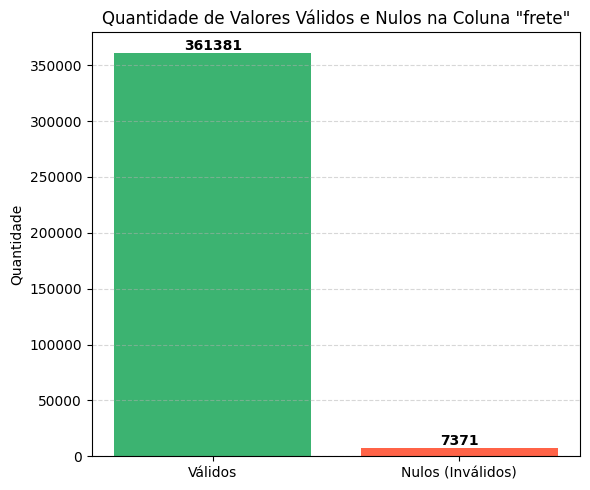

In [411]:
import matplotlib.pyplot as plt

# Verifica valores nulos na coluna frete
valores_nulos = df['frete'].isna().sum()
valores_validos = df['frete'].notna().sum()

# Dados para o gráfico
dados = [valores_validos, valores_nulos]
labels = ['Válidos', 'Nulos (Inválidos)']
colors = ['mediumseagreen', 'tomato']

# Plotando o gráfico
plt.figure(figsize=(6, 5))
plt.bar(labels, dados, color=colors)
plt.title('Quantidade de Valores Válidos e Nulos na Coluna "frete"')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar os valores acima das barras
for i, valor in enumerate(dados):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [412]:

import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('novo_arquivo.csv')

# Garantir que 'frete' está como numérico
df['frete'] = pd.to_numeric(df['frete'], errors='coerce')

# Calcular média de frete por estado
media_frete_estado = df.groupby('estado')['frete'].mean().to_dict()

# Função para preencher frete faltante com base no estado
def preencher_frete(row):
    if pd.notna(row['frete']):
        return row['frete']
    if pd.notna(row['estado']) and row['estado'] in media_frete_estado:
        return media_frete_estado[row['estado']]
    return df['frete'].mean()  # Média geral, caso não tenha estado

# Aplicar função
df['frete'] = df.apply(preencher_frete, axis=1)

# Criar coluna auxiliar
df['retirado_localmente'] = df['frete'] == 0

# Salvar o novo arquivo
df.to_csv('novo_arquivo.csv', index=False)

# Visualizar
print(df[['estado', 'frete', 'retirado_localmente']].head())


  estado  frete  retirado_localmente
0     RJ   20.0                False
1     MG    0.0                 True
2     RJ   22.0                False
3     RJ   20.0                False
4     MG    0.0                 True


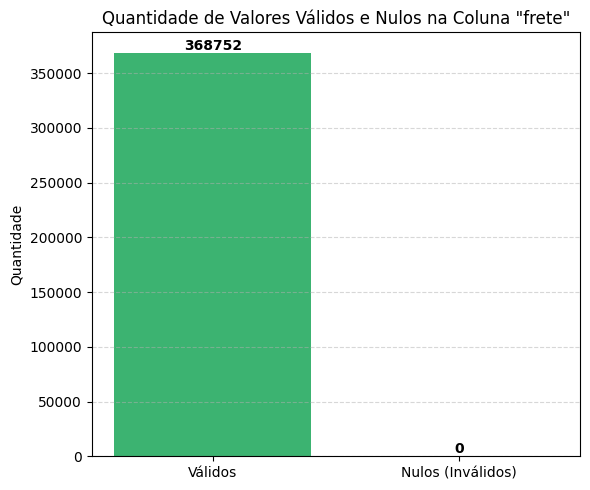

In [413]:
import matplotlib.pyplot as plt

# Verifica valores nulos na coluna frete
valores_nulos = df['frete'].isna().sum()
valores_validos = df['frete'].notna().sum()

# Dados para o gráfico
dados = [valores_validos, valores_nulos]
labels = ['Válidos', 'Nulos (Inválidos)']
colors = ['mediumseagreen', 'tomato']

# Plotando o gráfico
plt.figure(figsize=(6, 5))
plt.bar(labels, dados, color=colors)
plt.title('Quantidade de Valores Válidos e Nulos na Coluna "frete"')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar os valores acima das barras
for i, valor in enumerate(dados):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 🧼 Remoção de Espaços em Branco nos Nomes dos Clientes

Durante a análise de dados, é comum encontrar **espaços em branco indesejados** no início ou final de strings, especialmente em campos como nomes de clientes. Esses espaços podem comprometer agrupamentos, buscas e comparações.

Neste caso, foi aplicado um tratamento para **remover espaços fantasmas** da coluna `cliente`.

### 📌 Passos Realizados:

1. **Leitura do Arquivo**: Carregamos o dataset `novo_arquivo.csv`.
2. **Limpeza dos Dados**: Utilizamos a função `strip()` para eliminar espaços em branco no início e no fim de cada nome da coluna `cliente`.
3. **Salvamento dos Dados**: Após a limpeza, os dados atualizados foram salvos novamente no arquivo CSV.

### 🧾 Trecho de Código Usado:

In [414]:
# Leia o arquivo CSV
df = pd.read_csv('novo_arquivo.csv')

# Remova os espaços fantasmas no começo e no final dos nomes
df['cliente'] = df['cliente'].apply(lambda x: x.strip())

# Salve o arquivo CSV atualizado
df.to_csv('novo_arquivo.csv', index=False)

## 💳 Correção de Erros de Digitação na Coluna `forma_pagamento`

A coluna `forma_pagamento` continha diversas variações incorretas para três formas principais de pagamento. Realizamos uma padronização para garantir consistência e melhorar a qualidade dos dados.

### 🎯 Formas de Pagamento Corrigidas:

- **Pix**
- **Transferência bancária**
- **Cartão de crédito**

### 🛠️ Etapas Realizadas:

1. **Criação de um Mapeamento** com erros comuns de digitação.
2. **Aplicação da Correção** usando `.map()` para substituir os valores errados.
3. **Salvamento do Arquivo Corrigido** em `novo_arquivo.csv`.

### 🧠 Exemplos Corrigidos:

| Valor Original         | Valor Corrigido          |
|------------------------|--------------------------|
| `pix`, `PIX`, `píx`    | `Pix`                    |
| `Transferencia`, `transferência`, `tranferência` | `Transferência bancária` |
| `cartao de credito`, `Cartão Crédito` | `Cartão de crédito`      |

### 🧾 Código Utilizado:


In [415]:

import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('novo_arquivo.csv')

# Mapeamento de valores incorretos para os corretos
forma_pagamento_map = {
    'pix': 'Pix',
    'Pix': 'Pix',
    'píx': 'Pix',
    'pIX': 'Pix',
    'PIX': 'Pix',

    'transferência bancaria': 'Transferência bancária',
    'Transferencia bancaria': 'Transferência bancária',
    'Transferência': 'Transferência bancária',
    'transferência': 'Transferência bancária',
    'Transfêrencia bancária': 'Transferência bancária',
    'tranferência': 'Transferência bancária',
    'transferencia': 'Transferência bancária',

    'Cartão de Crédito': 'Cartão de crédito',
    'cartão de crédito': 'Cartão de crédito',
    'Cartao de credito': 'Cartão de crédito',
    'cartao de credito': 'Cartão de crédito',
    'cartao crédito': 'Cartão de crédito',
    'Cartão crédito': 'Cartão de crédito',
    'Cartão Crédito': 'Cartão de crédito'
}

# Aplicar correção
df['pagamento'] = df['pagamento'].astype(str).str.strip().map(lambda x: forma_pagamento_map.get(x, x))

# Salvar o arquivo corrigido
df.to_csv('novo_arquivo.csv', index=False)

# Exibir os valores únicos corrigidos para conferência
print(df['pagamento'].unique())


['Cartão de crédito' 'Pix' 'Transferência Bancária' 'Boleto' 'Pix à Vista'
 'Cartão Crédito à Vista' 'Pagamento Instantâneo' 'Boleto à Vista' 'DOC'
 'TED' 'Boleto no Dinheiro']


## 📦 Padronização da Coluna `status`

Para garantir a consistência dos dados na coluna `status`, realizamos a padronização de valores com erros de digitação. A seguir, as etapas executadas e os valores considerados corretos.

### ✅ Status Padronizados:

- **Pagamento confirmado**
- **Aguardando pagamento**
- **Em separação**
- **Entregue**

### 🛠️ Etapas Realizadas:

1. **Mapeamento** de variações comuns e erros de digitação.
2. **Aplicação da correção** usando `.map()`.
3. **Atualização do CSV** com os dados corrigidos.

### 📌 Exemplos Corrigidos:

| Valor Original         | Valor Corrigido        |
|------------------------|------------------------|
| `pagamento confimado`  | `Pagamento confirmado` |
| `aguardandopagamento`  | `Aguardando pagamento` |
| `separando`            | `Em separação`         |
| `entrega realizada`    | `Entregue`             |

### 🧾 Código Utilizado:

In [416]:
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('novo_arquivo.csv')

# Mapeamento de variações incorretas para os valores padronizados
status_map = {
    'pagamento confirmado': 'Pagamento confirmado',
    'Pagamento confirmado': 'Pagamento confirmado',
    'pagamento Confirmado': 'Pagamento confirmado',
    'pagamento confimado': 'Pagamento confirmado',
    'Pagamento Confirmado': 'Pagamento confirmado',

    'aguardando pagamento': 'Aguardando pagamento',
    'Aguardando pagamento': 'Aguardando pagamento',
    'Aguardando Pagamento': 'Aguardando pagamento',
    'aguardando Pagamento': 'Aguardando pagamento',
    'aguardandopagamento': 'Aguardando pagamento',
    'ag. pagamento': 'Aguardando pagamento',

    'em separação': 'Em separação',
    'Em separação': 'Em separação',
    'Em Separação': 'Em separação',
    'emSeparação': 'Em separação',
    'separando': 'Em separação',

    'entregue': 'Entregue',
    'Entregue': 'Entregue',
    'entrega realizada': 'Entregue',
    'foi entregue': 'Entregue'
}

# Aplicar correções
df['status'] = df['status'].astype(str).str.strip().map(lambda x: status_map.get(x, x))

# Salvar o arquivo corrigido
df.to_csv('novo_arquivo.csv', index=False)

# Visualizar os valores únicos após a padronização
print(df['status'].unique())


['Pagamento confirmado' 'Em separação' 'Entregue com Sucesso'
 'Aguardando pagamento' 'Em Transporte' 'AP' 'Entregue' 'PC' 'Sep'
 'Separando' 'Pgto Confirmado' 'Transp' 'Transportando' 'Entg'
 'Aguardando Pgto']
